In [3]:
%matplotlib inline
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
import scipy.stats as stats

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['1deg_c1', '025deg_c1', '01deg_c1', '1deg_c2', '025deg_c2', '01deg_c2', '1deg_c3', '025deg_c3', '01deg_c3']


In [4]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight", facecolor = 'w')  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

### Function

In [5]:
def correlation():
    df1 = pd.DataFrame({'x':x1, 'y':y1})
    df2 = pd.DataFrame({'x':x2, 'y':y2})
    df3 = pd.DataFrame({'x':x3, 'y':y3})
    # print(df1.x.corr(df1.y))
    # print(df2.x.corr(df2.y))
    # print(df3.x.corr(df3.y))
    r1, p1=stats.pearsonr(df1.x,df1.y)
    r2, p2=stats.pearsonr(df2.x,df2.y)
    r3, p3=stats.pearsonr(df3.x,df3.y)
    a1.append(r1)
    a2.append(r2)
    a3.append(r3)
    b1.append(p1)
    b2.append(p2)
    b3.append(p3)

### 分段平均

In [6]:
def isplit_by_n(ls, n):
    for i in range(0, len(ls), n):
        yield ls[i:i+n]

def split_by_n(ls, n):
    return list(isplit_by_n(ls, n))

In [10]:
dataset1 = pd.read_csv('4.2.2 Sverdrup_trans_EAUC/ST-IR_37.5(1).csv')
dataset2 = pd.read_csv('4.1.2 EAUC_trans_model/EAUC_trans_37.5(1).csv')

j = 10

X1 = dataset1.iloc[:, 1].values
X2 = dataset1.iloc[:, 2].values
X3 = dataset1.iloc[:, 3].values
Y1 = dataset2.iloc[:, 1].values
Y2 = dataset2.iloc[:, 2].values
Y3 = dataset2.iloc[:, 3].values

x1 = split_by_n(X1,j)
x1 = [sum(x)/len(x) for x in x1]
x2 = split_by_n(X2,j)
x2 = [sum(x)/len(x) for x in x2]
x3 = split_by_n(X3,j)
x3 = [sum(x)/len(x) for x in x3]
y1 = split_by_n(Y1,j)
y1 = [sum(x)/len(x) for x in y1]
y2 = split_by_n(Y2,j)
y2 = [sum(x)/len(x) for x in y2]
y3 = split_by_n(Y3,j)
y3 = [sum(x)/len(x) for x in y3]

x1 = x1[:-1]
x2 = x2[:-1]
x3 = x3[:-1]
y1 = y1[:-1]
y2 = y2[:-1]
y3 = y3[:-1]
        
a1 = []
a2 = []
a3 = []
b1 = []
b2 = []
b3 = []

correlation()



for i in range(1,21):

    X1 = dataset1.iloc[:-i, 1].values
    X2 = dataset1.iloc[:-i, 2].values
    X3 = dataset1.iloc[:-i, 3].values
    Y1 = dataset2.iloc[i:, 1].values
    Y2 = dataset2.iloc[i:, 2].values
    Y3 = dataset2.iloc[i:, 3].values

    x1 = split_by_n(X1,j)
    x1 = [sum(x)/len(x) for x in x1]
    x2 = split_by_n(X2,j)
    x2 = [sum(x)/len(x) for x in x2]
    x3 = split_by_n(X3,j)
    x3 = [sum(x)/len(x) for x in x3]
    y1 = split_by_n(Y1,j)
    y1 = [sum(x)/len(x) for x in y1]
    y2 = split_by_n(Y2,j)
    y2 = [sum(x)/len(x) for x in y2]
    y3 = split_by_n(Y3,j)
    y3 = [sum(x)/len(x) for x in y3]
    
    if i != 3:
        x1 = x1[:-1]
        x2 = x2[:-1]
        x3 = x3[:-1]
        y1 = y1[:-1]
        y2 = y2[:-1]
        y3 = y3[:-1]

    correlation()
        
        
test1 = pd.DataFrame({'1deg':a1,'025deg':a2,'01deg':a3})

test1.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

print(test1)

round(test1,2).to_csv('4.3.23 correlation and lags/correlation and lags(' + str(j) + ').csv')



test2 = pd.DataFrame({'1deg':b1,'025deg':b2,'01deg':b3})

test2.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

print(test2)

round(test2,2).to_csv('4.3.23 p value and lags/p value and lags(' + str(j) + ').csv')

        1deg    025deg     01deg
0   0.168084  0.199739  0.558673
1   0.191774  0.304439  0.583857
2   0.212221  0.350956  0.564428
3   0.220515  0.381726  0.507494
4   0.204699  0.420230  0.438235
5   0.211799  0.409282  0.473274
6   0.222076  0.323919  0.418939
7   0.216766  0.275143  0.356485
8   0.222818  0.291824  0.479228
9   0.205533  0.226939  0.317490
10  0.165306  0.111626  0.235105
11  0.137054  0.032828  0.159435
12  0.124374  0.027439  0.129261
13  0.155383  0.045732  0.114867
14  0.163770  0.059573  0.077954
15  0.148231  0.018903 -0.128645
16  0.121395  0.037436 -0.213760
17  0.094891 -0.023490 -0.366588
18  0.073124 -0.086574 -0.539638
19  0.081901 -0.059328 -0.450294
20  0.100394 -0.010292 -0.470467
        1deg    025deg     01deg
0   0.504968  0.426822  0.015954
1   0.445860  0.219328  0.010959
2   0.397870  0.153297  0.014679
3   0.379241  0.118021  0.031565
4   0.430633  0.093058  0.078489
5   0.414458  0.102814  0.055007
6   0.391627  0.204671  0.094173
7   0.4033

### 连续平均求 correlation

In [4]:
dataset1 = pd.read_csv('4.2.2 Sverdrup_trans_EAUC/ST-IR_35(1).csv')
dataset2 = pd.read_csv('4.1.2 EAUC_trans_model/-EAUC_trans_35(1).csv')

for j in range (2,11):
    
    X1 = dataset1.iloc[:, 1].values
    X2 = dataset1.iloc[:, 2].values
    X3 = dataset1.iloc[:, 3].values
    Y1 = dataset2.iloc[:, 1].values
    Y2 = dataset2.iloc[:, 2].values
    Y3 = dataset2.iloc[:, 3].values
    
    w = j
    
    x1 = np.convolve(X1, np.ones(w), 'valid') / w
    x2 = np.convolve(X2, np.ones(w), 'valid') / w
    x3 = np.convolve(X3, np.ones(w), 'valid') / w
    y1 = np.convolve(Y1, np.ones(w), 'valid') / w
    y2 = np.convolve(Y2, np.ones(w), 'valid') / w
    y3 = np.convolve(Y3, np.ones(w), 'valid') / w

    a1 = []
    a2 = []
    a3 = []
    b1 = []
    b2 = []
    b3 = []

    correlation()


    for i in range(1,21):

        X1 = dataset1.iloc[:-i, 1].values
        X2 = dataset1.iloc[:-i, 2].values
        X3 = dataset1.iloc[:-i, 3].values
        Y1 = dataset2.iloc[i:, 1].values
        Y2 = dataset2.iloc[i:, 2].values
        Y3 = dataset2.iloc[i:, 3].values

        x1 = np.convolve(X1, np.ones(w), 'valid') / w
        x2 = np.convolve(X2, np.ones(w), 'valid') / w
        x3 = np.convolve(X3, np.ones(w), 'valid') / w
        y1 = np.convolve(Y1, np.ones(w), 'valid') / w
        y2 = np.convolve(Y2, np.ones(w), 'valid') / w
        y3 = np.convolve(Y3, np.ones(w), 'valid') / w

        correlation()


    test = pd.DataFrame({'1deg':a1,'025deg':a2,'01deg':a3})

    test.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

    print(test)

    round(test,2).to_csv('4.3.2 correlation and lags EAUC/correlation and lags (' + str(j) + ').csv')

        1deg    025deg     01deg
0   0.060209  0.225080  0.188419
1   0.100336  0.279291  0.272776
2   0.092807  0.303936  0.203662
3   0.097842  0.366012  0.180525
4   0.115164  0.369639  0.239617
5   0.115075  0.307315  0.163602
6   0.068197  0.208347  0.015352
7   0.035078  0.086878 -0.062736
8   0.056719  0.034911 -0.026396
9   0.074094  0.096665  0.039338
10  0.081467  0.179543  0.053460
11  0.098774  0.242302  0.106671
12  0.111679  0.313079  0.153302
13  0.110778  0.281803  0.111070
14  0.079055  0.169341  0.024369
15  0.037064  0.086556 -0.048278
16  0.033689  0.013908  0.046961
17  0.018140 -0.057162  0.097861
18 -0.038662 -0.090196 -0.038797
19 -0.097027 -0.147730 -0.155827
20 -0.128422 -0.193256 -0.225427
        1deg    025deg     01deg
0   0.059577  0.277476  0.265507
1   0.103374  0.343937  0.301746
2   0.130693  0.439452  0.322094
3   0.135689  0.456109  0.287135
4   0.144310  0.476199  0.281756
5   0.130957  0.383803  0.176366
6   0.102677  0.278502  0.071559
7   0.0742

### Plot

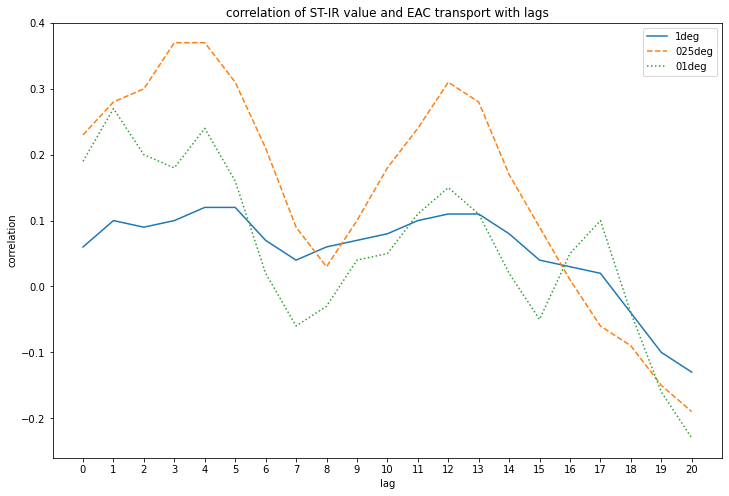

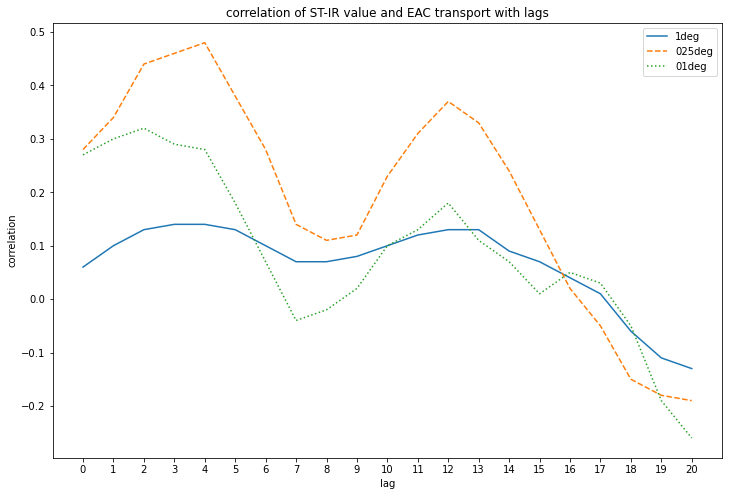

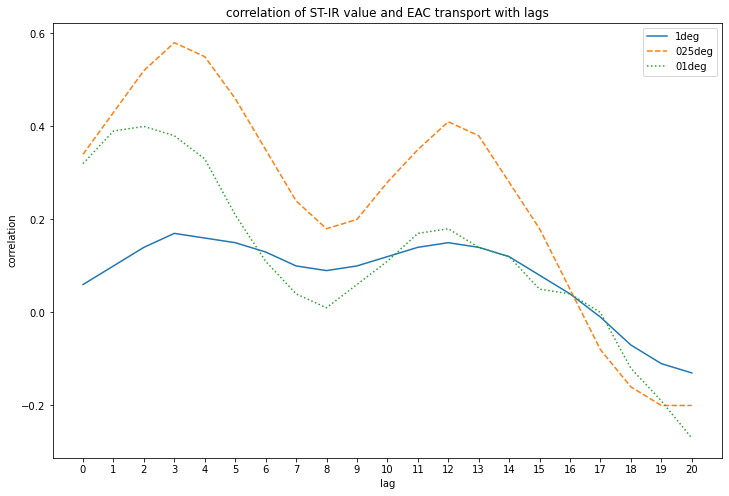

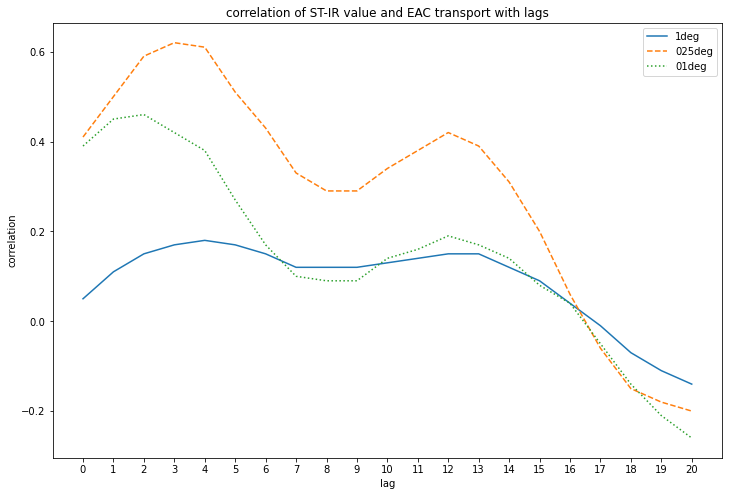

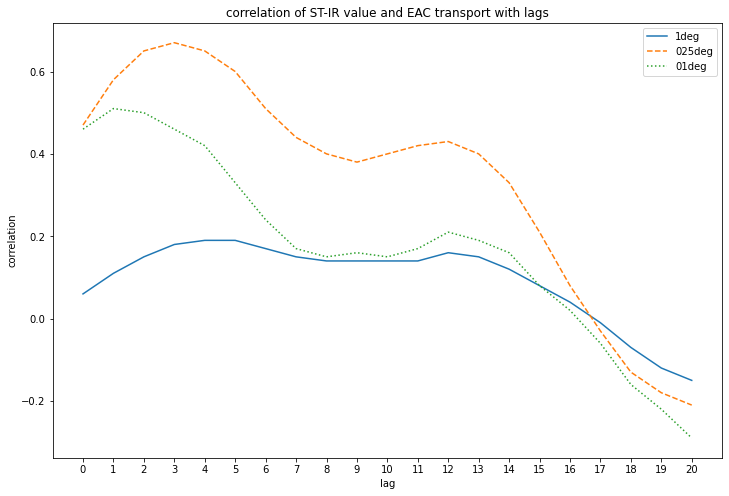

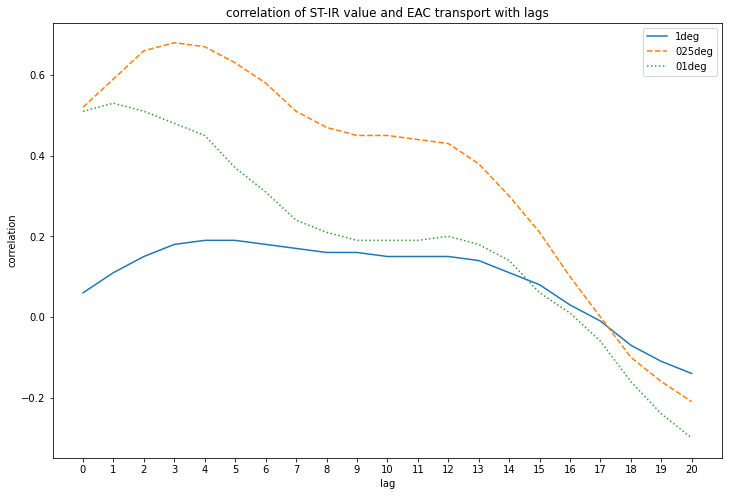

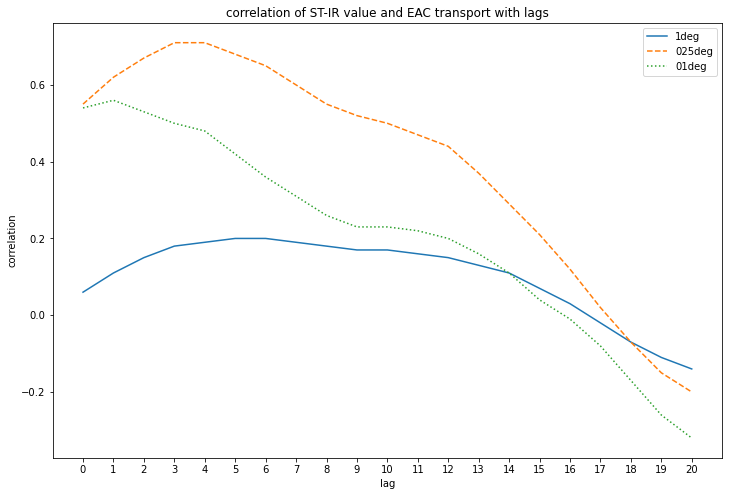

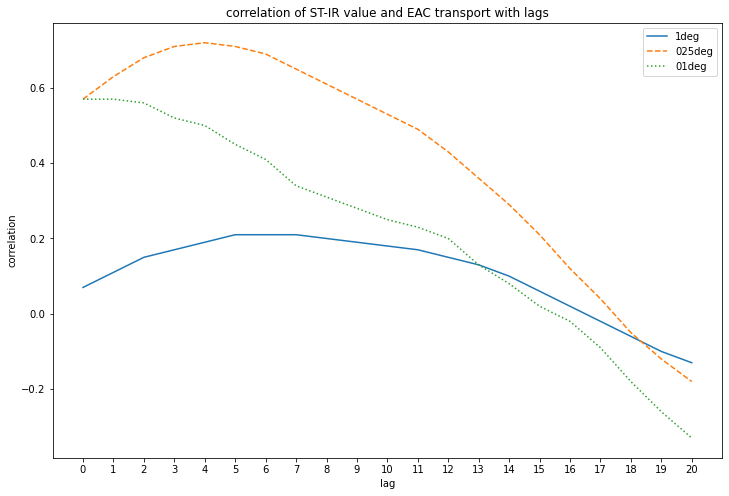

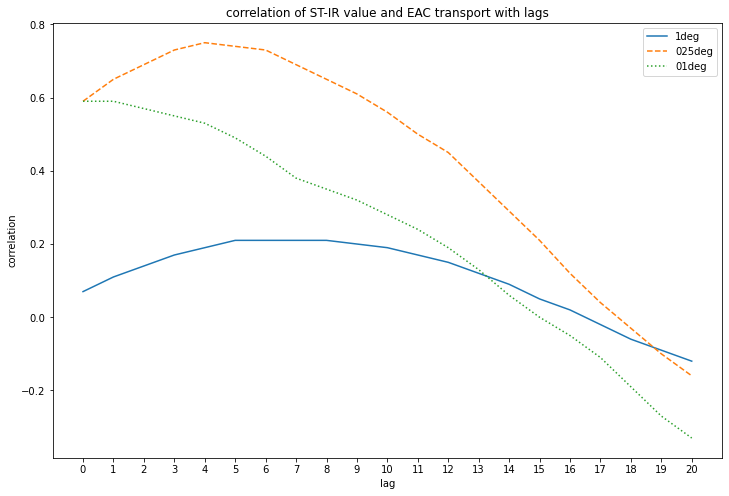

In [5]:
for j in range (2,11):

    x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    dataset = pd.read_csv('4.3.2 correlation and lags EAUC/correlation and lags (' + str(j) + ').csv')  
    y1 = dataset.iloc[:, 1].values
    y2 = dataset.iloc[:, 2].values
    y3 = dataset.iloc[:, 3].values
    
    plt.figure(figsize(12,8))

    plt.plot(x,y1, label = '1deg')
    plt.plot(x,y2, label = '025deg',linestyle = '--')
    plt.plot(x,y3, label = '01deg',linestyle = ':')

    # plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
    plt.legend(loc=1)                        
    plt.xticks(x)
    plt.title('correlation of ST-IR value and EAC transport with lags')
    plt.xlabel('lag')
    plt.ylabel('correlation')

    savefigure('correlation and lag of ' + str(j) + '-year averaged') 